## Project: Wrangling and Analyze Data

## Table of Contents
- <a href = "#intro"> Introduction </a>
    - <a href = "#imports"> Notebook Imports </a>
    - <a href = "#constants"> Constants </a>
    - <a href = "#functions"> Functions </a>
- Data Wrangling
    - <a href = "#gathering"> Data Gathering </a>
    - <a href = "#assessing"> Data Assessing </a>
    - <a href = "#cleaning"> Data Cleaning </a>
        - <a href = "#quality">Quality Issues</a>
        - <a href = "#tidiness">Tidiness Issues</a>
    - <a href = "#storing"> Data Storing </a>
- <a href = "#analysis"> Data Analysis and Visualization </a>
- <a href = "#conclusions"> Conclusions </a>

<a id='intro'></a>
## Introduction
> The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='imports'></a>
### Notebook Imports

In [1]:
import pandas as pd # For manipulation of dataframe

import numpy as np # For manipulation of dataframe

import os # For accessing the Operating system

import requests # for accessing web urls

import tweepy # For accessing and manipulating twitter API

import json # For mnipulating Json files

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

<a id='constants'></a>
### Constants

In [2]:
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_file = file_url.split("/")[-1]

API_KEY = input("Enter API key: ")
API_SECRET = input("Enter API secret: ")
ACCESS_TOKEN = input("Enter access token: ")
ACCESS_SECRET = input("Enter access secret: ")

Enter API key: xO7mdDFyOW0Qf6FrkbjBq4oxM
Enter API secret: thxp1I69xrrgl8F2sgreX96VdXBvZubv4Yb1vRrf5y2G0bSYDu
Enter access token: 1147169775505854464-1yxEgZ0VMcEG3IXFfLpGFKTohl3fVb
Enter access secret: 68n7vfuF8QbCBMIog9CD39f3TcDaPteGu6mp7qakp1vHA


<a id = "functions"></a>
### Functions

In [3]:
def space_to_null(value):
    if value == '':
        value = np.NaN
    return value

In [4]:
def none_to_null(value):
    if value == 'None':
        value = np.NaN
    return value

<a id = "gathering"></a>
## Data Gathering
In the cell below, we gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
# Directly read csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Download the file from the URl
response = requests.get(file_url)

# Specify the path for the file to be saved
with open(os.path.join(os.getcwd(), image_file), "wb") as file:
    file.write(response.content)

In [7]:
image_df = pd.read_csv(image_file, sep = "\t")
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
auth = tweepy.OAuth1UserHandler(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)
api.verify_credentials()

User(_api=<tweepy.api.API object at 0x0000023F88F7AC10>, _json={'id': 1147169775505854464, 'id_str': '1147169775505854464', 'name': 'HannahNS', 'screen_name': 'Nwokocha_Hannah', 'location': '', 'description': 'Javascript Enthusiast', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 95, 'friends_count': 188, 'listed_count': 0, 'created_at': 'Fri Jul 05 15:46:02 +0000 2019', 'favourites_count': 282, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 123, 'lang': None, 'status': {'created_at': 'Mon Feb 22 04:42:22 +0000 2021', 'id': 1363710700154212353, 'id_str': '1363710700154212353', 'text': "Hey, I am going to be documenting my progress on @hashnode. It's amazing and I think you should try it too.", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'hashnode', 'name': 'Hashnode', 'id': 3957817872, 'id_str': '3957817872', 'indices': [49, 58]}], 'ur

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
archive_ids = archive_df["tweet_id"].values
print(len(archive_ids))

2356


In [10]:
%%time
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
order = 0
fails = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in archive_ids:
        order += 1
        if order % 10 == 0:
            print(str(order) + ': ' + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print('success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        # For failed tweet ids
        except tweepy.errors.TweepyException as e:
            print('failed')
            fails[tweet_id] = e
            pass
    
print(fails)
len(fails)

success
success
success
success
success
success
success
success
success
10: 890240255349198849
success
success
success
success
success
success
success
success
success
success
20: 888202515573088257
failed
success
success
success
success
success
success
success
success
success
30: 886366144734445568
success
success
success
success
success
success
success
success
success
success
40: 884876753390489601
success
success
success
success
success
success
success
success
success
success
50: 882762694511734784
success
success
success
success
success
success
success
success
success
success
60: 880872448815771648
success
success
success
success
success
success
success
success
success
success
70: 879050749262655488
success
success
success
success
success
success
success
success
success
failed
80: 877556246731214848
success
success
success
success
success
success
success
success
success
success
90: 875021211251597312
success
success
success
success
success
success
failed
success
success
success
100:

success
success
success
success
success
success
success
800: 772826264096874500
success
success
success
success
success
success
success
success
success
success
810: 771500966810099713
success
success
success
success
success
success
failed
success
success
failed
820: 770655142660169732
success
success
success
success
success
success
success
success
success
success
830: 768909767477751808
success
success
success
success
success
success
success
success
success
success
840: 767191397493538821
success
success
failed
success
success
success
success
success
success
success
850: 766008592277377025
success
success
success
success
success
success
success
success
success
success
860: 763183847194451968
success
success
success
success
success
success
success
success
success
success
870: 761745352076779520
success
success
success
success
success
success
success
success
success
success
880: 760641137271070720
success
success
success
success
success
success
success
success
failed
success
890: 7597934

Rate limit reached. Sleeping for: 321


success
success
success
success
success
success
success
success
success
910: 757725642876129280
success
success
success
success
success
success
success
success
success
success
920: 756526248105566208
success
success
success
success
success
success
success
success
success
success
930: 754482103782404096
success
success
success
failed
success
success
success
success
success
success
940: 753039830821511168
success
success
success
success
success
success
success
success
success
success
950: 752309394570878976
success
success
success
success
success
success
success
success
success
success
960: 751251247299190784
success
success
success
success
success
success
success
success
success
success
970: 750132105863102464
success
success
success
success
success
success
success
success
success
success
980: 749981277374128128
success
success
success
success
success
success
success
success
success
success
990: 748932637671223296
success
success
success
success
success
success
success
success
success
s

success
success
success
success
success
success
success
1690: 681340665377193984
success
success
success
success
success
success
success
success
success
success
1700: 680970795137544192
success
success
success
success
success
success
success
success
success
success
1710: 680609293079592961
success
success
success
success
success
success
success
success
success
success
1720: 680161097740095489
success
success
success
success
success
success
success
failed
success
success
1730: 679862121895714818
success
success
success
success
success
success
success
success
success
success
1740: 679511351870550016
success
success
success
success
success
success
success
success
success
success
1750: 679047485189439488
success
success
success
success
success
success
success
success
success
success
1760: 678740035362037760
success
success
success
success
success
success
success
success
success
success
1770: 678380236862578688
success
success
success
success
success
success
success
success
success
success


Rate limit reached. Sleeping for: 347


success
success
success
success
success
success
success
success
success
1810: 676864501615042560
success
success
success
success
success
success
success
success
success
success
1820: 676590572941893632
success
success
success
success
success
success
success
success
success
success
1830: 676237365392908289
success
success
success
success
success
success
success
success
success
success
1840: 675891555769696257
success
success
success
success
success
success
success
success
success
success
1850: 675781562965868544
success
success
success
success
success
success
success
success
success
success
1860: 675497103322386432
success
success
success
success
success
success
success
success
success
success
1870: 675153376133427200
success
success
success
success
success
success
success
success
success
success
1880: 675015141583413248
success
success
success
success
success
success
success
success
success
success
1890: 674774481756377088
success
success
success
success
success
success
success
success

30

In [11]:
# creating a dictionary to hold the tweets
tweet_list = [json.loads(line) for line in open('tweet_json.txt', "r")]

In [12]:
tweet_df = []
for tweet in tweet_list:
    tweet_id = tweet['id']
    tweet_likes = tweet['favorite_count']
    tweet_retweet = tweet['retweet_count']
    
    tweet_holder = {
        'tweet_id': tweet_id,
        'tweet_likes': tweet_likes,
        'tweet_retweet': tweet_retweet
    }
    
    tweet_df.append(tweet_holder)
    
tweet_df

[{'tweet_id': 892420643555336193, 'tweet_likes': 33655, 'tweet_retweet': 6955},
 {'tweet_id': 892177421306343426, 'tweet_likes': 29183, 'tweet_retweet': 5263},
 {'tweet_id': 891815181378084864, 'tweet_likes': 21944, 'tweet_retweet': 3463},
 {'tweet_id': 891689557279858688, 'tweet_likes': 36691, 'tweet_retweet': 7170},
 {'tweet_id': 891327558926688256, 'tweet_likes': 35128, 'tweet_retweet': 7706},
 {'tweet_id': 891087950875897856, 'tweet_likes': 17705, 'tweet_retweet': 2576},
 {'tweet_id': 890971913173991426, 'tweet_likes': 10303, 'tweet_retweet': 1643},
 {'tweet_id': 890729181411237888,
  'tweet_likes': 56526,
  'tweet_retweet': 15660},
 {'tweet_id': 890609185150312448, 'tweet_likes': 24388, 'tweet_retweet': 3598},
 {'tweet_id': 890240255349198849, 'tweet_likes': 27807, 'tweet_retweet': 6056},
 {'tweet_id': 890006608113172480, 'tweet_likes': 26896, 'tweet_retweet': 6103},
 {'tweet_id': 889880896479866881, 'tweet_likes': 24441, 'tweet_retweet': 4132},
 {'tweet_id': 889665388333682689, '

In [13]:
tweet_df = pd.DataFrame(tweet_df)

<a id='assessing'></a>
## Assessing Data

In [14]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive_df[archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
1620,684940049151070208,NaN,NaN,2016-01-07 03:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oreo. She's a photographer and a model...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684940049...,12,10,Oreo,None,None,None,None


In [19]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
1053,714214115368108032,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.533967,True,bloodhound,0.164826,True,German_shepherd,0.046524,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False


In [23]:
tweet_df

,tweet_id,tweet_likes,tweet_retweet
0,892420643555336193,33655,6955
1,892177421306343426,29183,5263
2,891815181378084864,21944,3463
3,891689557279858688,36691,7170
4,891327558926688256,35128,7706
...,...,...,...
2321,666049248165822465,88,36
2322,666044226329800704,245,114
2323,666033412701032449,100,36
2324,666029285002620928,112,39


In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2326 non-null   int64
 1   tweet_likes    2326 non-null   int64
 2   tweet_retweet  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [25]:
tweet_df.describe()

,tweet_id,tweet_likes,tweet_retweet
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,7018.175408,2455.242906
std,6.816442e+16,10901.878172,4156.436254
min,6.660209e+17,0.000000,1.000000
25%,6.780814e+17,1219.500000,493.000000
50%,7.178159e+17,3034.500000,1143.500000
75%,7.986402e+17,8562.500000,2844.250000
max,8.924206e+17,143980.000000,70165.000000


In [26]:
tweet_df.sample(5)

,tweet_id,tweet_likes,tweet_retweet
968,748324050481647620,3432,685
1236,709901256215666688,605,92
1302,705591895322394625,2896,1019
444,817423860136083457,31678,13501
1853,674805413498527744,758,315


In [27]:
all_columns = pd.Series(list(archive_df) + list(image_df) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [28]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Quality issues

1. Remove retweets since they are not needed.

2. Update invalid ratings with decimal values.

3. Dropping unnecessary columns in `archive` and `image` dataset.

4. Erroneous datatypes in `archive`, `image` and `tweet` dataset.

5. Replace invalid dog names with NaN..

6. Merge multiple dog states.

7. Change 'None' to NaN(name, doggo, pupper, puppo).

8. Rename column names in `image` table.

9. Standarize naming of dog breeds.

### Tidiness issues
1. One variable spans Four columns in `archive` table

2. Combine the three tables(dog type, likes and retweet should be part of the `archive` table)

<a id='cleaning'></a>
## Cleaning Data

In [29]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

<a id='quality'></a>
## QUALITY ISSUES

### `ARCHIVE` DATAFRAME
### Removing Retweets

#### Define:
We have to drop rows that are replies or retweets since thay are not needed as part of the dataset

#### Code

In [30]:
# find row that are replies
replies = (~archive_clean.in_reply_to_status_id.isnull())
replies.sum()

archive_clean = archive_clean[~replies]

In [31]:
# find row that are retweets
retweet = (~archive_clean.retweeted_status_id.isnull())
retweet.sum()

archive_clean = archive_clean[~retweet]

#### Test

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Update invalid ratings with decimal values

#### Define:
Use regex to extract the ratings from the text again because of the tweets that had their rating numerator and denominators extracted incorrectly because their rating were decimal

#### Code

In [33]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [34]:
archive_clean.rating_numerator = ratings[0]

In [35]:
archive_clean.rating_denominator = ratings[1]

#### Test

In [36]:
archive_clean[archive_clean.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


### Dropping unnecessary columns

#### Define
Dropping unnecessary columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url)

#### Code

In [37]:
archive_clean.drop(["in_reply_to_status_id", 
                    "in_reply_to_user_id",
                    "source", "text",
                    "retweeted_status_id", 
                    "retweeted_status_user_id", 
                    "retweeted_status_timestamp"], axis = 1, inplace = True)

#### Test

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   expanded_urls       2094 non-null   object
 3   rating_numerator    2097 non-null   object
 4   rating_denominator  2097 non-null   object
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(1), object(9)
memory usage: 180.2+ KB


### Erroneous Datatype

#### Define:
Erroneous datatypes(tweet_id, timestamp, retweeted_status_timestamp) but since the retweeted_status_timestamp column has already been dropped we would just change the datatype of:
<ul>
    <li>timestamp from object to datetime</li>
    <li>tweet_id from int to object</li>
    <li>rating_numerator from int to float</li>
</ul>

#### Code

In [39]:
archive_clean = archive_clean.astype({
    "tweet_id": object,
    "rating_numerator": float
})
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   expanded_urls       2094 non-null   object             
 3   rating_numerator    2097 non-null   float64            
 4   rating_denominator  2097 non-null   object             
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 180.2+ KB


### Replace invalid dog names with NaN

#### Define:
Invalid dog names were not capitalized, this names are going to be replaced with NaN

#### Code

In [41]:
mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()
unique_val = archive_clean[mask].name.unique()
unique_val

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [42]:
archive_clean["name"] = archive_clean.name.apply(lambda x: np.NaN if x in unique_val else x)

#### Test

In [43]:
archive_clean.name.value_counts()

None          603
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

### Merge Multiple dog stages

#### Define:
Get cases that have multiple dog stages in a row and merge the stages together in the stage column

In [44]:
# Getting te cases where there are multiple dog stages in a row
archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1761
1,None,None,None,puppo,23
2,None,None,pupper,None,221
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [45]:
# Replacing None values with empty space
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [46]:
# Creating stage column from cases where there are multiple dog stages in a row
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
archive_clean[archive_clean.stage == 'doggo, floofer']

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
200,854010172552949760,2017-04-17 16:34:26+00:00,https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,floofer,,,"doggo, floofer"


#### Test

In [47]:
archive_clean['stage'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Change 'None'  and empty spaces to NaN

#### Define:
Change Change 'None' and empty spaces to NaN(name, doggo, floofer, pupper, puppo and stage)

#### Code

In [48]:
archive_clean["name"] = [none_to_null(value) for value in archive_clean["name"]]

In [49]:
archive_clean["doggo"] = [space_to_null(value) for value in archive_clean["doggo"]]
archive_clean["floofer"] = [space_to_null(value) for value in archive_clean["floofer"]]
archive_clean["pupper"] = [space_to_null(value) for value in archive_clean["pupper"]]
archive_clean["puppo"] = [space_to_null(value) for value in archive_clean["puppo"]]
archive_clean["stage"] = [space_to_null(value) for value in archive_clean["stage"]]

#### Test

In [50]:
archive_clean.sample(5)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1134,728653952833728512,2016-05-06 18:33:34+00:00,https://twitter.com/dog_rates/status/728653952...,8.0,10,Coleman,NaN,NaN,NaN,NaN,NaN
1647,683828599284170753,2016-01-04 01:53:37+00:00,https://twitter.com/dog_rates/status/683828599...,12.0,10,NaN,NaN,NaN,pupper,NaN,pupper
252,844973813909606400,2017-03-23 18:07:10+00:00,https://twitter.com/dog_rates/status/844973813...,12.0,10,Brady,NaN,NaN,NaN,NaN,NaN
404,824025158776213504,2017-01-24 22:44:42+00:00,https://twitter.com/badlandsnps/status/8239662...,14.0,10,NaN,NaN,NaN,NaN,NaN,NaN
995,748346686624440324,2016-06-30 02:45:28+00:00,https://twitter.com/dog_rates/status/748346686...,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
archive_clean['stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

### `IMAGE` Table

### Rename column names

#### Define:
Rename column names of the image table since the column names are not descriptive enough

#### Code

In [52]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [53]:
image_clean.rename({
    'tweet_id': 'tweet_id',
    'jpg_url': 'image_url',
    'img_num': 'image_number',
    'p1': 'prediction1',
    'p1_conf': 'prediction_confidence1',
    'p1_dog': 'boolean_dog1',
    'p2': 'prediction2',
    'p2_conf': 'prediction_confidence2',
    'p2_dog': 'boolean_dog2',
    'p3': 'prediction3',
    'p3_conf': 'prediction_confidence3',
    'p3_dog': 'boolean_dog3'
}, axis = 1, inplace = True)

#### Test

In [54]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   image_url               2075 non-null   object 
 2   image_number            2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction_confidence1  2075 non-null   float64
 5   boolean_dog1            2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction_confidence2  2075 non-null   float64
 8   boolean_dog2            2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction_confidence3  2075 non-null   float64
 11  boolean_dog3            2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Dropping unnecessary column

#### Define:
Dropping the image number column

#### Code

In [55]:
image_clean.drop(["image_number"], axis = 1, inplace = True)

#### Test

In [56]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   image_url               2075 non-null   object 
 2   prediction1             2075 non-null   object 
 3   prediction_confidence1  2075 non-null   float64
 4   boolean_dog1            2075 non-null   bool   
 5   prediction2             2075 non-null   object 
 6   prediction_confidence2  2075 non-null   float64
 7   boolean_dog2            2075 non-null   bool   
 8   prediction3             2075 non-null   object 
 9   prediction_confidence3  2075 non-null   float64
 10  boolean_dog3            2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Erroneous datatypes

#### Define:
Erroneous datatypes(tweet_id). Tweet_id should have a datatype of string not int

#### Code

In [57]:
image_clean = image_clean.astype({
    "tweet_id": object
})

#### Test

In [58]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   image_url               2075 non-null   object 
 2   prediction1             2075 non-null   object 
 3   prediction_confidence1  2075 non-null   float64
 4   boolean_dog1            2075 non-null   bool   
 5   prediction2             2075 non-null   object 
 6   prediction_confidence2  2075 non-null   float64
 7   boolean_dog2            2075 non-null   bool   
 8   prediction3             2075 non-null   object 
 9   prediction_confidence3  2075 non-null   float64
 10  boolean_dog3            2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


### Standarize naming of dog breeds

#### Define:
Capitalize all the predicted dog breeds so that they can be standardized and not a mixture of upper and lower case

#### Code

In [59]:
image_clean["prediction1"] = [item.capitalize() for item in image_clean["prediction1"]]
image_clean["prediction2"] = [item.capitalize() for item in image_clean["prediction2"]]
image_clean["prediction3"] = [item.capitalize() for item in image_clean["prediction3"]]

#### Test

In [60]:
image_clean.prediction1.value_counts()

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Pillow                  1
Carousel                1
Bald_eagle              1
Lorikeet                1
Orange                  1
Name: prediction1, Length: 378, dtype: int64

### `TWEET` TABLE

### Erroneous Datatype

#### Define:
Erroneous datatype in the tweet_id column, the datatype should be string not int

#### Code

In [61]:
tweet_clean = tweet_clean.astype({
    "tweet_id": object
})

#### Test

In [62]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2326 non-null   object
 1   tweet_likes    2326 non-null   int64 
 2   tweet_retweet  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


<a id='tidiness'></a>
## TIDINESS ISSUES

### One variable spans Three columns

#### Define:
One variable spans Three columns in `archive` table, so we ave to consolidate the three columns to a new clumn called dog_state where we would have the states that were given and the empty space would would filled with NaN

#### Code

In [63]:
# form the dog_state column from the three columns
archive_clean['stage'] = archive_clean.stage.fillna(archive_clean.doggo.fillna(archive_clean.floofer.fillna(archive_clean.pupper.fillna(archive_clean.puppo))))

In [64]:
# Drop the unnecessary columns
archive_clean.drop(["doggo",
                 "floofer",
                 "pupper",
                 "puppo"], axis = 1, inplace = True)

#### Test

In [65]:
archive_clean['stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

### Combine the three tables

#### Define:
We will create a new table from merging the three tables to get one consolidated table with all information about the tweets

#### Code

In [66]:
rate_dogs_tweet = archive_clean.merge(tweet_clean, on = "tweet_id")

In [67]:
rate_dogs_tweet = rate_dogs_tweet.merge(image_clean, on = "tweet_id")

#### Test

In [68]:
rate_dogs_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1963 non-null   object             
 1   timestamp               1963 non-null   datetime64[ns, UTC]
 2   expanded_urls           1963 non-null   object             
 3   rating_numerator        1963 non-null   float64            
 4   rating_denominator      1963 non-null   object             
 5   name                    1342 non-null   object             
 6   stage                   302 non-null    object             
 7   tweet_likes             1963 non-null   int64              
 8   tweet_retweet           1963 non-null   int64              
 9   image_url               1963 non-null   object             
 10  prediction1             1963 non-null   object             
 11  prediction_confidence1  1963 non-null   flo

In [69]:
rate_dogs_tweet.sample(5)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,tweet_likes,tweet_retweet,image_url,prediction1,prediction_confidence1,boolean_dog1,prediction2,prediction_confidence2,boolean_dog2,prediction3,prediction_confidence3,boolean_dog3
1010,706593038911545345,2016-03-06 21:31:22+00:00,https://twitter.com/dog_rates/status/706593038...,10.0,10,NaN,NaN,1981,577,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,Four-poster,0.696423,False,Quilt,0.189312,False,Pillow,0.029409,False
1527,674436901579923456,2015-12-09 03:54:22+00:00,https://twitter.com/dog_rates/status/674436901...,9.0,10,Bailey,NaN,986,343,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,Acorn_squash,0.375392,False,Shih-tzu,0.105416,True,Lhasa,0.072832,True
1845,668171859951755264,2015-11-21 20:59:20+00:00,https://twitter.com/dog_rates/status/668171859...,7.0,10,NaN,NaN,424,161,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,Chihuahua,0.664834,True,Cowboy_boot,0.060343,False,Giant_panda,0.059838,False
1802,668955713004314625,2015-11-24 00:54:05+00:00,https://twitter.com/dog_rates/status/668955713...,10.0,10,NaN,NaN,240,63,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,Cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,Soft-coated_wheaten_terrier,0.067006,True
93,870308999962521604,2017-06-01 16:00:09+00:00,https://twitter.com/dog_rates/status/870308999...,13.0,10,Rumble,NaN,19395,3528,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,Greater_swiss_mountain_dog,0.622752,True,Appenzeller,0.158463,True,Entlebucher,0.148115,True


<a id='storing'></a>
## Storing Data

In [70]:
rate_dogs_tweet.to_csv("twitter-master-archive.csv", index = False)

<a id='analysis'></a>
## Analyzing and Visualizing Data

### Insights:
1. The most retweeted dog type

2. The Highest rated dog type

3. The most popular dog type

4. Tweet with the highest number of likes

5. Tweet with the lowest number of likes

### The most retweeted dog type

In [71]:
sort_retweeted = rate_dogs_tweet.sort_values("tweet_retweet", ascending = False)
high_retweeted = sort_retweeted.head(1)
high_retweeted.prediction1

762    Labrador_retriever
Name: prediction1, dtype: object

The most retweeted tweet was of a Labrador retriever

### The Highest rated dog type

In [73]:
sort_rated = rate_dogs_tweet.sort_values("rating_numerator", ascending = False)
high_rated = sort_rated[sort_rated.boolean_dog1 == True]

In [75]:
high_rated.head(1).prediction1

652    Labrador_retriever
Name: prediction1, dtype: object

The top rated dog type was a Labrador retriever

### The most popular dog type

In [77]:
high_rated = rate_dogs_tweet[rate_dogs_tweet.boolean_dog1 == True][["tweet_likes", "rating_numerator", 
                                                                      "expanded_urls", "stage",
                                                                     "prediction1"]]
high_rated.head(10)

,tweet_likes,rating_numerator,expanded_urls,stage,prediction1
1,29183,13.0,https://twitter.com/dog_rates/status/892177421...,NaN,Chihuahua
2,21944,12.0,https://twitter.com/dog_rates/status/891815181...,NaN,Chihuahua
4,35128,12.0,https://twitter.com/dog_rates/status/891327558...,NaN,Basset
5,17705,13.0,https://twitter.com/dog_rates/status/891087950...,NaN,Chesapeake_bay_retriever
6,10303,13.0,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",NaN,Appenzeller
7,56526,13.0,https://twitter.com/dog_rates/status/890729181...,NaN,Pomeranian
8,24388,13.0,https://twitter.com/dog_rates/status/890609185...,NaN,Irish_terrier
9,27807,14.0,https://twitter.com/dog_rates/status/890240255...,doggo,Pembroke
10,26896,13.0,https://twitter.com/dog_rates/status/890006608...,NaN,Samoyed
11,24441,13.0,https://twitter.com/dog_rates/status/889880896...,NaN,French_bulldog


In [78]:
high_rated.prediction1.value_counts().head(1)

Golden_retriever    137
Name: prediction1, dtype: int64

The most popular dog type that was tweeted was the golden retriever

### Tweet with the highest number of likes

In [80]:
highest_likes = rate_dogs_tweet.sort_values("tweet_likes", ascending = False)[["tweet_likes", "rating_numerator", 
                                                                               "expanded_urls", "stage"]]
highest_likes.head(10)

,tweet_likes,rating_numerator,expanded_urls,stage
762,143980,13.0,https://twitter.com/dog_rates/status/744234799...,doggo
302,123463,13.0,https://twitter.com/dog_rates/status/822872901...,puppo
393,110911,13.0,https://twitter.com/dog_rates/status/807106840...,NaN
107,108355,13.0,https://twitter.com/dog_rates/status/866450705...,pupper
797,106536,13.0,https://twitter.com/dog_rates/status/739238157...,doggo
58,92356,13.0,https://twitter.com/dog_rates/status/879415818...,NaN
326,82276,14.0,https://twitter.com/dog_rates/status/819004803...,doggo
133,80146,12.0,https://twitter.com/dog_rates/status/859196978...,NaN
92,73616,13.0,https://twitter.com/dog_rates/status/870374049...,NaN
1401,73098,12.0,https://twitter.com/dog_rates/status/678399652...,NaN


In [81]:
highest_likes["expanded_urls"].values[0]

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

### Tweet with the lowest number of likes

In [82]:
lowest_likes = rate_dogs_tweet.sort_values("tweet_likes", ascending = True)[["tweet_likes", "rating_numerator", 
                                                                               "expanded_urls", "stage"]]
lowest_likes.head(10)

,tweet_likes,rating_numerator,expanded_urls,stage
1946,66,11.0,https://twitter.com/dog_rates/status/666102155...,NaN
1958,88,5.0,https://twitter.com/dog_rates/status/666049248...,NaN
1926,90,9.0,https://twitter.com/dog_rates/status/666447344...,NaN
1949,92,6.0,https://twitter.com/dog_rates/status/666082916...,NaN
1934,93,7.0,https://twitter.com/dog_rates/status/666407126...,NaN
1944,98,10.0,https://twitter.com/dog_rates/status/666268910...,NaN
1953,99,8.0,https://twitter.com/dog_rates/status/666058600...,NaN
1960,100,9.0,https://twitter.com/dog_rates/status/666033412...,NaN
1927,106,7.0,https://twitter.com/dog_rates/status/666437273...,NaN
1932,106,10.0,https://twitter.com/dog_rates/status/666418789...,NaN


In [83]:
lowest_likes["expanded_urls"].values[0]

'https://twitter.com/dog_rates/status/666102155909144576/photo/1'

### Visualization

1. The most retweeted dog state
2. The most popular dog names

### The most retweeted dog states

In [87]:
sort_retweeted = rate_dogs_tweet.sort_values("tweet_retweet", ascending = False)[["tweet_likes", "tweet_retweet",
                                                                                  "rating_numerator", "expanded_urls", 
                                                                                  "stage"]]
high_retweeted = sort_retweeted.head(10)
high_retweeted

,tweet_likes,tweet_retweet,rating_numerator,expanded_urls,stage
762,143980,70165,13.0,https://twitter.com/dog_rates/status/744234799...,doggo
797,106536,52520,13.0,https://twitter.com/dog_rates/status/739238157...,doggo
393,110911,51305,13.0,https://twitter.com/dog_rates/status/807106840...,NaN
302,123463,39677,13.0,https://twitter.com/dog_rates/status/822872901...,puppo
58,92356,37191,13.0,https://twitter.com/dog_rates/status/879415818...,NaN
326,82276,34354,14.0,https://twitter.com/dog_rates/status/819004803...,doggo
395,70182,32166,13.0,https://twitter.com/dog_rates/status/806629075...,NaN
107,108355,30009,13.0,https://twitter.com/dog_rates/status/866450705...,pupper
1401,73098,28414,12.0,https://twitter.com/dog_rates/status/678399652...,NaN
1459,70555,27595,10.0,https://twitter.com/dog_rates/status/676219687...,NaN


In [89]:
top_state = high_retweeted.stage.value_counts()
top_state

doggo     3
puppo     1
pupper    1
Name: stage, dtype: int64

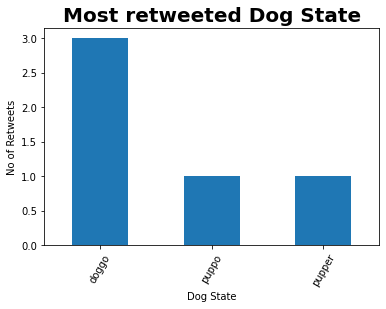

In [90]:
top_state.plot(kind='bar')
plt.xticks(rotation=60)
plt.title("Most retweeted Dog State", fontsize = 20, fontweight ='bold')
plt.xlabel('Dog State', fontsize = 10)
plt.ylabel('No of Retweets', fontsize = 10)
plt.show()

The most common dog stage that was retweeted was the Doggo stage

### The most popular dog names

In [91]:
top_names = rate_dogs_tweet.name.value_counts().nlargest(13)
top_names

Cooper     10
Oliver     10
Charlie    10
Lucy        9
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
Lola        7
Bella       6
Bo          6
Name: name, dtype: int64

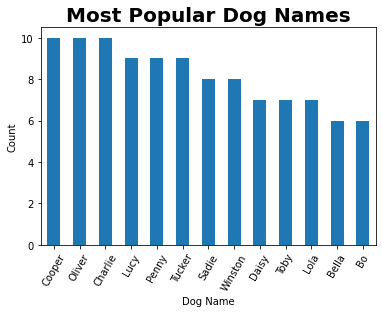

In [92]:
top_names.plot(kind='bar')
plt.xticks(rotation=60)
plt.title("Most Popular Dog Names", fontsize = 20, fontweight ='bold')
plt.xlabel('Dog Name', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

Cooper, Charlie and Oliver were the most popular names

<a id='conclusions'></a>
## Conclusions
From the analysis we were able to see that:
- Cooper, Charlie and Oliver are the most popular dog names
- Labrador retriever was the most retweeted dog type
- Doggo was the most retweeted dog state
- Golden retriever was the most popular dog type
- Labrador retriever was the highest rated dog